# Testing ML Approaches on Data

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
# Import the compressed data
dataset_name = 'four_params_Kbearing_c'
data_array = np.load(f'data/{dataset_name}.npy')
num_outputs = 1  # Change this based on the number of outputs in your dataset

# Shuffle the dataset rows with a known seed
np.random.seed(42)
np.random.shuffle(data_array)

# Decrease dataset size by factor of 10 for experimenting
# data_array = data_array[:len(data_array) // 1]

# Split the data into 80/20 train/test sets
train_data = data_array[:int(0.8 * len(data_array))]
test_data = data_array[int(0.8 * len(data_array)):]

# Split the features and labels
X_train = train_data[:, :-num_outputs]
y_train = train_data[:, -num_outputs:]
X_test = test_data[:, :-num_outputs]
y_test = test_data[:, -num_outputs:]

# Scale the features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Scale the labels
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [56]:
# Build a simple neural network model for a single SIF prediction output layer
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64),
    layers.LeakyReLU(),
    layers.Dense(64),
    layers.LeakyReLU(),
    layers.Dense(64),
    layers.LeakyReLU(),
    layers.Dense(32),
    layers.LeakyReLU(),
    layers.Dense(num_outputs)  # Single output layer
])
# Compile the model, with Adam optimizer and a learning rate of 0.001
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
# Train the model with EarlyStopping
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.fit(X_train_scaled, y_train_scaled, epochs=500, batch_size=16, validation_split=0.2)#, callbacks=[early_stop])

# Save the model in the models/ directory with a filename containing the data name and timestamp
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model.save(f'models/model_{dataset_name}_{timestamp}.keras')

# Save the scaler objects to scale/unscale future data
import joblib
joblib.dump(X_scaler, 'models/X_scaler.save')
joblib.dump(y_scaler, 'models/y_scaler.save')

Epoch 1/500


3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0717 - val_loss: 0.0841
Epoch 2/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0717 - val_loss: 0.0841
Epoch 2/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0649 - val_loss: 0.0385
Epoch 3/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0649 - val_loss: 0.0385
Epoch 3/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0502 - val_loss: 0.0308
Epoch 4/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0502 - val_loss: 0.0308
Epoch 4/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0475 - val_loss: 0.0599
Epoch 5/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0475 - val_loss: 0.0599
Epoch 5/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0381 - val_loss: 0.0715
Epoch 6/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0381 - val_loss: 0.0715
Epoch 6/500
3686/3686 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0406 - val_loss: 0.0243
Epoch 7/500
3686/3686 ━━━━━━━━━━━

### Import a model

576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.0010
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.0010
Test Loss: 0.0010421138722449541
Test Loss: 0.0010421138722449541


576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.0010
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 0.0010
Test Loss: 0.0010421138722449541
Test Loss: 0.0010421138722449541


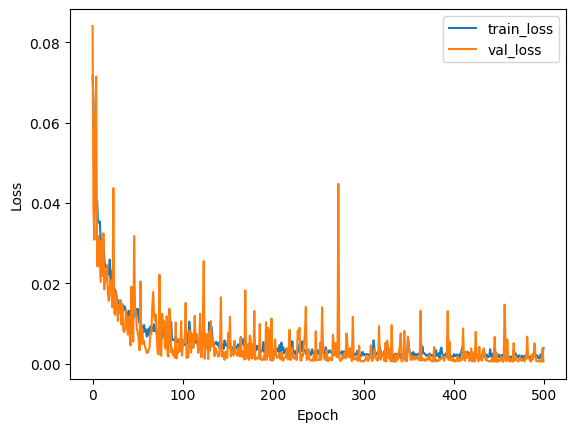

In [21]:
# Test the model on the scaled test set
test_loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test Loss: {test_loss}")

# Construct appropriate plots for analysis
# Plot training, validation, and test loss
history = model.history.history
plt.plot(history['loss'], label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Perform Predictions over input parameter sweep

In [ ]:
# Import a model from model_path
# model_path = 'models\model_four_params_Kbearing_c_20250916_131229.keras'
# model = keras.models.load_model(model_path)

# Import the scalers
# import joblib
# X_scaler = joblib.load('models/X_scaler.save')
# y_scaler = joblib.load('models/y_scaler.save')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\conda_temp\ipykernel_34144\1563168914.py:2: SyntaxWarning: invalid escape sequence '\m'
  model_path = 'models\model_four_params_Kbearing_c_20250916_131229.keras'


In [46]:
# Build a prediction function
def predict_hole_offset(input_features):
    # Ensure input_features is a 2D array
    input_array = np.array(input_features).reshape(1, -1)
    
    # Scale the input features
    input_scaled = X_scaler.transform(input_array)
    
    # Make prediction
    prediction_scaled = model.predict(input_scaled, verbose=0)
    
    # Inverse scale the prediction
    prediction = y_scaler.inverse_transform(prediction_scaled)
    
    return prediction.flatten()

In [ ]:
# Extract upper/lower bounds from the input dataset each feature
w_over_r_idx = 0
a_over_c_idx = 1
a_over_t_idx = 2
r_over_t_idx = 3

# Find the range of input values in the input dataset
W_r_bounds= []
a_c_bound = []
a_t_bound = []
R_t_bound = []

for i in range(data_array.shape[1] - num_outputs):
    col_min = np.min(data_array[:, i])
    col_max = np.max(data_array[:, i])
    if i == w_over_r_idx:
        W_r_bounds = [col_min, col_max]
    elif i == a_over_c_idx:
        a_c_bound = [col_min, col_max]
    elif i == a_over_t_idx:
        a_t_bound = [col_min, col_max]
    elif i == r_over_t_idx:
        R_t_bound = [col_min, col_max]

print(f"W_r bounds: {W_r_bounds}")
print(f"a_c bounds: {a_c_bound}")
print(f"a_t bounds: {a_t_bound}")
print(f"R_t bounds: {R_t_bound}")


W_r bounds: [np.float64(1.600000023841858), np.float64(1000.0)]
a_c bounds: [np.float64(0.10000000149011612), np.float64(10.0)]
a_t bounds: [np.float64(0.10000000149011612), np.float64(0.949999988079071)]
R_t bounds: [np.float64(0.10000000149011612), np.float64(10.0)]


### Run predictions

In [53]:
# Perform a parameter sweep over the input parameters
# R_t_values = np.linspace(R_t_bound[0], R_t_bound[1], 1)
# W_r_values = np.linspace(W_r_bounds[0], W_r_bounds[1], 1)
# a_c_values = np.linspace(a_c_bound[0], a_c_bound[1], 10)
# a_t_values = np.linspace(a_t_bound[0], a_t_bound[1], 10)

W_r_values = [15]
a_c_values = np.concatenate((np.linspace(0.1, 1.0, 10), np.linspace(1, 10, 10)))
a_t_values = np.linspace(0.05, 1.0, 20)
R_t_values = [0.1]

results = []

for W_r in W_r_values:
    for a_c in a_c_values:
        for a_t in a_t_values:
            for R_t in R_t_values:
                # Call the predict_hole_offset function with the current parameters
                prediction = predict_hole_offset([W_r, a_c, a_t, R_t])[0]
                results.append((W_r, a_c, a_t, R_t, prediction))



### Plot predictions for a fixed (W/r, R/t), for comparison against format_data.ipynb plot

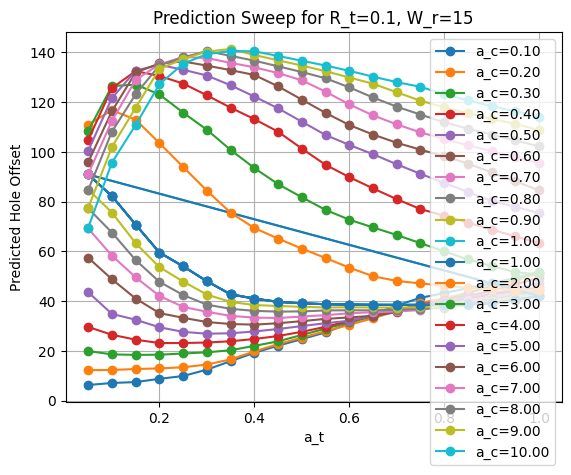

In [54]:
# Convert results to a NumPy array for easier handling
results_array = np.array(results)

# Plot a single a_t sweep for a fixed R_t, W_r, and a_c
fixed_W_r = W_r_values[len(W_r_values) // 2]
fixed_R_t = R_t_values[len(R_t_values) // 2]

# Plot multiple a_t sweeps for different a_c values, including legend
for fixed_a_c in a_c_values:
    a_t_sweep = results_array[(results_array[:, w_over_r_idx] == fixed_W_r) & 
                              (results_array[:, a_over_c_idx] == fixed_a_c) & 
                              (results_array[:, r_over_t_idx] == fixed_R_t)]


    plt.plot(a_t_sweep[:, 2], a_t_sweep[:, 4], marker='o', label=f'a_c={fixed_a_c:.2f}')
plt.xlabel('a_t')
plt.ylabel('Predicted Hole Offset')
plt.title(f'Prediction Sweep for R_t={fixed_R_t}, W_r={fixed_W_r}')
plt.legend()
plt.grid()
plt.show()


## 